# Chapter6. 학습 관련 기술들

이번 장에서는 신경망 학습의 핵심 개념들을 만나보자. 이번 장에서 다룰 주제는 가중치 매개변수의 최적값을 탐색하는 "__최적화 방법__", "__가중치 매개변수 초깃값__", "__하이퍼파라미터__" 설정 방법 등, 모두가 신경망 학습에서 중요한 주제이다. 오버피팅의 대응책인 "__가중치 감소__"와 "__드롭아웃__" 등의 정규화 방법도 간략히 설명하고 구현해 보자. 마지막으로 최근 많은 연구에서 사용하는 "__배치 정규화__"도 짧게 알아보자. 이번 장에서 설명하는 기법을 이용하면 신경망(딥러닝) 학습의 효율과 정확도를 높일 수 있다. 

# ============================================================

신경망 학습의 목적은 손실 함수의 값을 가능한 낮추는 매개변수를 찾는 것이다. 이는 곧 매개변수의 최적값을 찾는 문제이며, 이러한 문제를 푸는 것을 "__최적화(Optimization)__"이라고 한다. 안타깝게도 신경망 최적화는 굉장히 어려운 문제이다. 매개변수 공간은 매우 넓고 복잡해서 최적의 솔루션은 쉽게 찾지 못한다. 수식을 풀어 순식간에 최솟값을 구하는 방법 같은 것도 없다. 게다가 심층 신경망에서는 매개변수의 수가 엄청나게 많아져서 사태는 더욱 심각해진다.

지금까지는 최적의 매개변수 값을 찾는 단서로 매개변수의 기울기를 이용하였다. 매개변수의 기울기를 구해, 기울어진 방향으로 매개변수 값을 갱신하는 일을 몇 번이고 반복해서 점점 최적의 값에 다가갔다. 이것이 "__확률적 경사 하강법(SGD)__"이란 단순한 방법인데, 매개변수 공간을 무작정 찾는 것보다는 "똑똑한" 방법이다. SGD는 단순하지만, 문제에 따라서는 SGD보다 똑똑한 방법도 존재한다. 지금부터 SGD의 단점을 알아본 후 SGD와는 다른 최적화 기법을 알아보자.

# 6.1.1 모험가 이야기

본론으로 들어가기 전에, 최적화를 해야 하는 우리의 상황을 모험가 이야기에 비유해보자. 

> 색다른 모험가가 있습니다. 광활한 메마른 산맥을 여행하면서 날마다 깊은 골짜기를 찾아 발걸음을 옮깁니다. 그는 전설에 나오는 세상에서 가장 깊고 낮은 골짜기, "깊은 곳"을 찾아가려 합니다. 그것이 그의 여행 목적이죠. 게다가 그는 엄격한 "제약" 2개로 자신을 옭아맸습니다. 하나는 지도를 보지 않을 것, 또 하나는 눈가리개를 쓰는 것이다. 지도도 없고 보이지도 않으니 가장 낮은 골짜기가 광대한 땅 어디에 있는지 알 도리가 없죠. 그런 혹독한 조건에서 이 모험가는 어떻게 "깊은 곳"을 찾을 수 있을까요? 어떻게 걸음을 옮겨야 효율적으로 "깊은 곳"을 찾아낼 수 있을까요?

최적의 매개변수를 탐색하는 우리도 이 모험가와 같은 어둠의 세계를 탐험하게 된다. 이 어려운 상황에서 중요한 단서가 되는 것이 땅의 "기울기"이다. 모험가는 주위 경치는 볼 수 없지만 지금 서 있는 땅의 기울기는 알 수 있다. 발바닥으로 전해진다. 그래서 지금 서 있는 장소에서 가장 크게 기울어진 방향으로 가자는 것이 SGD의 전략이다. 이 일을 반복하면 언젠가 "깊은 곳"에 찾아갈 수 있을지도 모른다.

# 6.1.2 확률적 경사 하강법 (SGD)

최적화 문제의 어려움을 되새기고자 먼저 SGD를 복습해보자. SGD는 수식으로는 다음과 같이 쓸 수 있다.

$
W \gets W - \eta{\partial L \over \partial W}
\qquad$ [식 6.1]

여기에서 W는 갱신할 가중치 매개변수고 ${\partial L \over \partial W}$은 W에 대한 손실 함수의 기울기이다. $\eta$는 학습률을 의미하는데, 실제로는 0.01이나 0.001과 같은 값을 미리 정해서 사용한다. 또, $\gets$는 우변의 값으로 좌변의 값을 갱신한다는 뜻이다. [식 6.1]에서 보듯 SGD는 기울어진 방향으로 일정 거리만 가겠다는 단순한 방법이다. 그러면 이 SGD를 파이썬 클래스로 구현해보자.

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

초기화 때 받는 인수인 lr은 learning rate(학습률)를 뜻한다. 이 학습률을 인스턴스 변수로 유지한다. update(params, grads) 메소드는 SGD 과정에서 반복해서 불린다. 인수인 params와 grads는 딕셔너리 변수이다. SGD 클래스를 사용하면 신경망 매개변수의 진행을 다음과 같이 수행할 수 있다.
```
network = TwoLayerNet(...)
optimizer = SGD()

for i in range(iters_num):
    ...
    x_batch, t_batch = get_mini_batch(...)
    grads = network.gradient(x_batch, t_bacth)
    params = network.params
    optimizer.update(params, grads)
    ...
```
매개변수 갱신은 optimizer가 책임지고 수행하니 우리는 optimizer에 매개변수와 기울기 정보만 넘겨주면 된다. 이처럼 최적화를 담당하는 클래스를 분리해 구현하면 기능을 모듈화하기 좋다. 예를 들어 곧이어 소개할 모멘텀이라는 최적화 기법 역시 update(params, grads)라는 공통의 메소드를 갖도록 구현한다. 그때 optimizer = SGD() 문장을 optimizer = Momentum()으로만 변경하면 SGD가 모멘텀으로 바뀌는 것이다.

# 6.1.3 SGD의 단점

SGD는 단순하고 구현도 쉽지만 문제에 따라서는 비효율적일 때가 있다. 이번 적에서는 SGD의 단점을 알아보고자 다음 함수의 최솟값을 구하는 문제를 생각해보자.

$
f(x,y) = \frac{1}{20}x^2 + y^2
\qquad$ [식 6.2]

이 함수는 다음과 그림 중 왼쪽처럼 "밥그릇"을 x축 방향으로 늘인 듯한 모습이고, 실제로 그 등고선은 오른쪽과 같이 x축 방향으로 늘인 타원으로 되어 있다.

<img src=images/6_01.png height=100px width=500px>

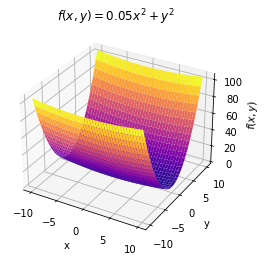

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np

def function(x):
    a = np.array([[0.05, 0], [0, 1]])
    
    return a@(x**2)

x, y =np.mgrid[-10:10.25:0.25, -10:10.25:0.25]
x = x.flatten()
y = y.flatten()
xy = np.vstack((x, y))

x = x.reshape(81,81)
y = y.reshape(81,81)
z = np.sum(function(xy), axis=0).reshape(81,81)
        
ax = plt.axes(projection="3d")

ax.plot_surface(x, y, z, cmap="plasma")
ax.set_title("$f(x,y) = 0.05x^2 + y^2$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("$f(x,y)$")
plt.show()

[식 6.2] 함수의 기울기를 그려보면 다음과 같다. 이 기울기는 y축 방향은 크고 x축 방향은 작다는 것이 특징이다. 또한, 최솟값이 되는 장소는 (x, y) = (0, 0) 이지만, 그림이 보여준느 기울기의 대부분은 (0, 0) 방향을 가리키지 않는다는 것이다.

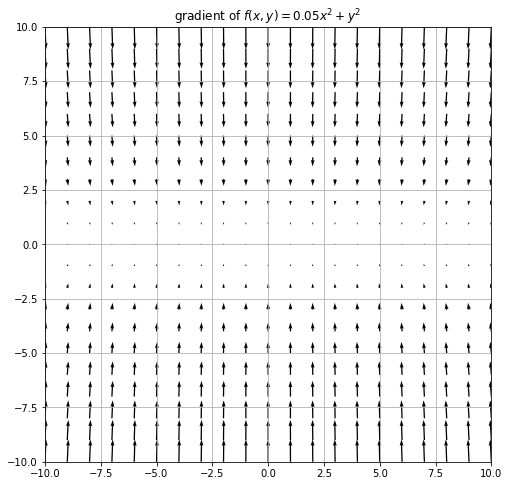

In [3]:
def gradient_f(x):
    a = np.array([[0.1, 0], [0, 2]])
    
    return a@x

x, y =np.mgrid[-10:10.25:1, -10:10.25:1]
x = x.flatten()
y = y.flatten()
xy = np.vstack((x, y))

x = x.reshape(21,21)
y = y.reshape(21,21)

grad = gradient_f(xy)

plt.figure(figsize=(8,8))
plt.quiver(x, y, -grad[0,:], -grad[1,:])
plt.title("gradient of $f(x,y) = 0.05x^2 + y^2$")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.show()

이제 그럼 [식 6.2]의 함수를 SGD에 적용시켜보자. 탐색을 시작하는 장소(초깃값)은 (x,y) = (-7.0, 2.0)으로 하자.

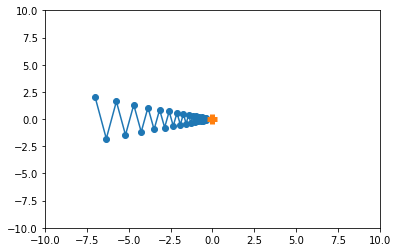

In [4]:
ic = np.array([-7.0, 2.0])
lr = 0.95

iters_num = 30

points = np.zeros((2,iters_num+1))
points[:,0] = ic

for i in range(iters_num):
    grad = gradient_f(ic)
    ic -= grad * lr
    points[:,i+1] = ic
    
plt.plot(points[0,:], points[1,:])
plt.scatter(points[0,:], points[1,:])
plt.scatter(0, 0, marker="+", s=100, linewidth=5)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

<img src=images/6_03.png height=100px width=500px>

이처럼 SGD는 위와 같이 심하게 굽어진 모습을 보여준다. 상당히 비효율적인 움직임이다. 즉, SGD의 단점은 비등방성(anisotropy)함수에서는 탐색 경로가 비효율적이라는 것이다. 이럴 때는 SGD와 같이 무작정 기울어진 방향으로 진행하는 단순한 방식보다 더 영리한 묘안이 간절해진다. 또한, SGD가 지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리켜서라는 점도 생각해볼 필요가 있다.

이제부터 SGD의 이러한 단점을 개선해주는 모멘텀, AdaGrad, Adam이라는 세 방법을 소개할 것이다. 이들은 모두 SGD를 대체하는 기법으로, 각각을 간단히 설명하면서 수식과 파이썬 구현을 살펴보자.

# 6.1.4 모멘텀

"__모멘텀(Momentum)__"은 "운동량"을 뜻하는 단어로, 물리와 관계가 있다. 모멘텀 기법은 수식으로는 다음과 같이 쓸 수 있다.

$
v \gets \alpha v - \eta {\partial L \over \partial W}
\qquad$ [식 6.3] 

$
W \gets W + v
\qquad$ [식 6.4]

[식 6.1]의 SGD처럼 여기에서도 W를 갱신할 가중치 매개변수, ${\partial L \over \partial W}$는 W에 대한 손실 함수의 기울기, $\eta$는 학습률 이다. $v$라는 변수가 새로 나오는데, 이는 물리에서 말하는 속도에 해당한다. [식 6.3]은 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 나타낸다. 모멘텀은 다음과 같이 공이 그릇의 바닥을 구르는 듯한 움직임을 보여준다.

<img src=images/6_04.png height=100px width=500px>

또, [식 6.3]의 $\alpha v$항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 한다.($\alpha$는 0.9등의 값으로 설정한다.) 물리에서의 지면 마찰이나 공기 저항에 해당한다. 

모멘텀을 구현해보자.

In [5]:
class Momentum:
    def __init__(self, lr=0.1, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

인스턴스 변수 v가 물체의 속도이다. v는 초기화 때는 아무 값도 담지 않고, 대신 update()가 처음 호출될 때 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장한다. 나머지 부분은 [식 6.3]과 [식 6.4]를 간단히 코드로 옮긴 것이다. 

이제 모멘텀을 사용해서 [식 6.2]의 최적화 문제를 풀어보자. 결과는 다음과 같다.

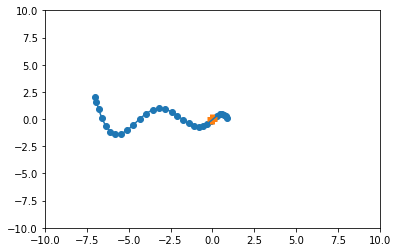

In [6]:
ic = {}
ic["xy"] = np.array([-7.0, 2.0])

grad = {}
grad["xy"] = None

moment = Momentum()

iters_num = 30

m_points = np.zeros((2, iters_num+1))
m_points[:,0] = ic["xy"]

for i in range(iters_num):
    grad["xy"] = gradient_f(ic["xy"])
    moment.update(ic, grad)
    m_points[:,i+1] = ic["xy"]
    
plt.plot(m_points[0,:], m_points[1,:])
plt.scatter(m_points[0,:], m_points[1,:])
plt.scatter(0, 0, marker="+", s=100, linewidth=5)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

<img src=images/6_05.png height=100px width=500px>

그림에서 보듯 모멘텀의 갱신 경로는 공이 그릇 바닥을 구르듯 움직인다. SGD와 비교하면 "지그재그 정도"가 덜할 것을 알 수 있다. 이는 x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문이다. 거꾸로 y축 힘은 크지만 위아래로 번갈아 받아서 상충하여 y출 방향의 속도는 안정적이지 않다. 전체적으로는 SGD보다 x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어든다.

# 6.1.5 AdaGrad

신경망 학습에서는 학습률(수식에서는 $\eta$로 표기) 값이 중요하다. 이 값이 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크면 발산하여 학습이 제대로 이뤄지지 않는다. 이 학습률을 정하는 효과적 기술로 "__학습률 감소(Learning Rate Decay)__"가 있다. 이는 학습을 진행하면서 학습률ㄹ을 점차 줄여가는 방법이다. 처음에는 크게 학습하다가 조금씩 작게 학습한다는 얘기로, 실제 신경망 학습에서 자주 쓰인다.

학습률을 서서히 낮추는 가장 간단한 방법은 매개변수 "전체"의 학습률 값을 일괄적으로 낮추는 것일 것이다. 이를 더욱 발전시킨 것이 AdaGrad이다. AdaGrad는 "각각의" 매개변수에 "맞춤형" 값을 만들어준다. 

AdaGrad는 개별 매개변수에 적응적으로(adaptive) 학습률을 조정하면서 학습을 진행한다.<br>
AdaGrad의 갱신 방법은 수식으로는 다음과 같다.

$
h \gets h + {\partial L \over \partial W} \bigodot {\partial L \over \partial W}
\qquad$ [식 6.5]

$
W \gets W - \eta \frac{1}{\sqrt{h}} {\partial L \over \partial W}
\qquad$ [식 6.6]

마찬가지로 W는 갱신할 가중치 매개변수, ${\partial L \over \partial W}$은 W의 대한 손실 함수의 기울기, $\eta$는 학습률을 뜻한다. 여기에서는 새로 h라는 변수가 등장한다. h는 [식 6.5]에서 보듯 기존 기울기 값을 제곱하여 계속 더해준다. ([식 6.5]의 $\bigodot$기호는 행렬의 원소별 곱셈을 의미한다. 그리고 매개변수를 갱신할 때 $\frac{1}{\sqrt{h}}$ 를 곱해 학습률을 조정한다. 매개변수의 원소 중에서 많이 움직인 원소는 학습률이 낮아진다는 뜻인데, 다시말해 학습률 감소가 매개변수의 원소마다 다르게 적용됨을 뜻한다. 

그럼 AdaGrad을 구현해보자.

In [35]:
class AdaGrad:
    def __init__(self, lr=1.5):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key])+1e-9)

여기에서 주의할 것은 마지막 줄에서 1e-7이라는 작은 값을 더하는 부분이다. 이 작은 값은 self.h[key]에 0이 담겨 있다 해도 0으로 나누는 사태를 막아준다. 대부분의 딥러닝 프레임워크에서는 이 값도 인수로 설정할 수 있다. 그럼 AdaGrad를 사용해서 [식 6.2]의 최적화 문제를 풀어보자. 결과는 다음과 같다.

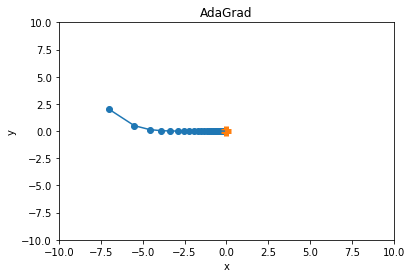

In [18]:
ic = {}
ic["xy"] = np.array([-7.0, 2.0])

grad = {}
grad["xy"] = None

AdaGrads = AdaGrad()

iters_num = 30

a_points = np.zeros((2, iters_num+1))
a_points[:,0] = ic["xy"]

for i in range(iters_num):
    grad["xy"] = gradient_f(ic["xy"])
    AdaGrads.update(ic, grad)
    a_points[:,i+1] = ic["xy"]
    
plt.plot(a_points[0,:], a_points[1,:])
plt.scatter(a_points[0,:], a_points[1,:])
plt.scatter(0,0, marker="+", s=100, linewidth=5)
plt.title("AdaGrad")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

<img src=images/6_06.png height=100px width=500px>

위의 그림을 보면 최솟값을 향해 효율적으로 움직이는 것을 알 수 있다. y축 방향은 기울기가 커서 처음에는 크게 움직이짐나, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작이지도록 조정된다. 그래서 y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어든다.

# 6.1.6 Adam

모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보였다. AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했다. 그럼 혹시 이 두 기법을 융합하면 어떻게 될까? 이런 생각에서 출발한 기법이 바로 Adam이다.(이 내용은 직관적이지만 완전히 정확하지는 않다.)

Adam은 2015년 에 제안된 새로운 방법이다. 그 이론은 다소 복잡하지만 직관적으로는 모멘텀과 AdaGrad를 융합한 듯한 방법이다. 이 두 방법의 이점을 조합했다면 매개변수 공간을 효율적으로 탐색해줄 것으로 기대된다. 또, 하이퍼파라미터의 "편향 보정"이 진행된다는 점도 Adam의 특징이다. 여기에서는 더 깊게 파고들진 않을 것이다. 

Adam 방법을 사용하여 [식 6.2]의 최적화 문제를 해결하면 다음과 같다.
<img src=images/6_07.png height=100px width=500px>

# 6.1.7 어느 갱신 방법을 이용할 것인가?

지금까지 매개변수의 갱신 방법을 4개 살펴보았다. 이번 적에서는 이들 네 기번의 결과를 비교해보자.

<img src=images/6_08.png height=100px width=500px>

이와 같이 사용한 방법에 따라 갱신 경로가 다르다. 이 그림만 보면 AdaGrad가 가장 나은 것 같은데, 사실 그 결과는 풀어야 할 문제가 무엇이냐에 따라 달라지므로 주의해야 한다. 또, 당연하지만 하이퍼파라미터를 어떻게 설정하느냐에 따라서도 결과가 바뀐다.

SGD, 모멘텀, AdaGrad, Adam의 네 후보 중 어느 것을 채택하면 될까? 유감스럽게도 모든 문제에서 항상 뛰어난 기법이라는 것은 (아직까진) 없다. 각자의 장단이 있어 잘 푸는 문제와 서툰 문제가 있다.

# 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

손글씨 숫자 인식을 대상으로 지금까지 설명한 네 기법을 비교해보자. 각 방법의 학습 진도가 얼마나 다른지를 그림으로 그려 보았다.
<img src=images/6_09.png height=100px width=500px>



In [9]:
def filter(n,y):
    filtered = np.zeros(len(y)-1)

    for k in range(1, len(y)):
        value_data = 0
        if k <= n:
            for t in range(1, k+1):
                value_data += y[t]
            filtered[k-1] += (value_data/k)
        else:
            for t in range(k-n+1, k+1):
                value_data += y[t]
            filtered[k-1] += (value_data/n)

    return filtered

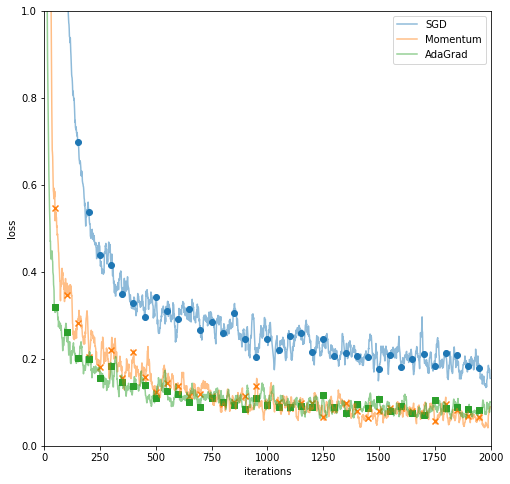

In [37]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from twolayernet import TwoLayerNet
from source.dataset.mnist import load_mnist
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

SGD_loss_list = []
Momentum_loss_list = []
AdaGrad_loss_list = []
SGD_loss_point = []
Momentum_loss_point = []
AdaGrad_loss_point = []

network1 = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
network2 = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
network3 = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

optimizer1 = SGD(lr=learning_rate)
optimizer2 = Momentum(lr=learning_rate)
optimizer3 = AdaGrad(lr=0.09)
                     
## with SGD
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network1.gradient(x_batch, t_batch)
    
    optimizer1.update(network1.params, grads)
    
    loss = network1.loss(x_batch, t_batch)
    SGD_loss_list.append(loss)
    
## with Momentum
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network2.gradient(x_batch, t_batch)
    
    optimizer2.update(network2.params, grads)
    
    loss = network2.loss(x_batch, t_batch)
    Momentum_loss_list.append(loss)
    
## with AdaGrad
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network3.gradient(x_batch, t_batch)
    
    optimizer3.update(network3.params, grads)
    
    loss = network3.loss(x_batch, t_batch)
    AdaGrad_loss_list.append(loss)
        
iters = np.arange(len(SGD_loss_list)-1)

SGD_loss_list = filter(11, SGD_loss_list)
Momentum_loss_list = filter(11, Momentum_loss_list)
AdaGrad_loss_list = filter(11, AdaGrad_loss_list)

plt.figure(figsize=(8,8))
plt.plot(iters, SGD_loss_list, label="SGD", alpha=0.5)
plt.plot(iters, Momentum_loss_list, label="Momentum", alpha=0.5)
plt.plot(iters, AdaGrad_loss_list, label="AdaGrad", alpha=0.5)
plt.scatter(iters[::50], SGD_loss_list[::50], marker="o")
plt.scatter(iters[::50], Momentum_loss_list[::50], marker="x")
plt.scatter(iters[::50], AdaGrad_loss_list[::50], marker="s")
plt.xlabel("iterations")
plt.ylabel("loss")
plt.xlim(0,2000)
plt.ylim(0.0,1.0)
plt.legend()
plt.show()

이 실험은 각 층이 100개의 뉴런으로 구성된 5층 신경망에서 ReLU 함수를 활성화 함수로 사용해 측정하였다.

그 아래 그래프는 3층 신경망을 이용해 측정한 결과이다.

결과를 보면 SGD의 학습 진도가 가장 느리다. 나머지 세 기법의 진도는 비슷한데, 자세히보면 AdaGrad가 조금 더 빠른 것 같다. 이 실험에서 주의할 점은 하이퍼파라미터인 학습률과 신경망의 구조(층 깊이 등)에 따라 결과가 달라진다는 것이다. 다만 일반적으로 SGD보다 다른 세 기법이 빠르게 학습하고, 때로는 최종 정확도도 높게 나타난다.